In [9]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Read Data
companies = ['GOOGL', 'AAPL','AMZN','NKE']
test = data.DataReader(companies, 'yahoo', start='2015/01/01', end='2019/12/31')
test.head()

Attributes   Adj Close                                         Close  \
Symbols          GOOGL       AAPL        AMZN        NKE       GOOGL   
Date                                                                   
2015-01-02  529.549988  24.861401  308.519989  44.347309  529.549988   
2015-01-05  519.460022  24.161013  302.190002  43.633312  519.460022   
2015-01-06  506.640015  24.163294  295.290009  43.376633  506.640015   
2015-01-07  505.149994  24.502111  298.420013  44.272652  505.149994   
2015-01-08  506.910004  25.443539  300.459991  45.294640  506.910004   

Attributes                                          High             ...  \
Symbols          AAPL        AMZN        NKE       GOOGL       AAPL  ...   
Date                                                                 ...   
2015-01-02  27.332500  308.519989  47.514999  535.799988  27.860001  ...   
2015-01-05  26.562500  302.190002  46.750000  527.989990  27.162500  ...   
2015-01-06  26.565001  295.290009  46.474998  521.210022  26.857500  ...   
2015-01-07  26.937500  298.420013  47.435001  511.489990  27.049999  ...   
2015-01-08  27.972500  300.459991  48.529999  507.500000  28.037500  ...   

Attributes         Low                   Open                         \
Symbols           AMZN        NKE       GOOGL       AAPL        AMZN   
Date                                                                   
2015-01-02  306.959991  47.055000  532.599976  27.847500  312.579987   
2015-01-05  300.850006  46.564999  527.150024  27.072500  307.010010   
2015-01-06  292.380005  46.035000  520.500000  26.635000  302.239990   
2015-01-07  295.329987  46.549999  510.950012  26.799999  297.500000   
2015-01-08  296.109985  47.810001  501.510010  27.307501  300.320007   

Attributes                Volume                                     
Symbols           NKE      GOOGL         AAPL       AMZN        NKE  
Date                                                                 
2015-01-02  48.275002  1324000.0  212818400.0  2783200.0  4985800.0  
2015-01-05  47.255001  2059100.0  257142000.0  2774200.0  6889200.0  
2015-01-06  46.945000  2722800.0  263188400.0  3519000.0  7576000.0  
2015-01-07  46.805000  2345900.0  160423600.0  2640300.0  7256000.0  
2015-01-08  47.830002  3652700.0  237458000.0  3088400.0  5978200.0  

[5 rows x 24 columns]

In [11]:
# Closing price
df =  test['Adj Close']
df.head()

Symbols,GOOGL,AAPL,AMZN,NKE
Date,,,,
2015-01-02,529.549988,24.861401,308.519989,44.347309
2015-01-05,519.460022,24.161013,302.190002,43.633312
2015-01-06,506.640015,24.163294,295.290009,43.376633
2015-01-07,505.149994,24.502111,298.420013,44.272652
2015-01-08,506.910004,25.443539,300.459991,45.294640


### Step3:  PORTFOLIO EXPECTED RETURN

In [12]:
# Yearly returns for individual companies
ind_er  =  df.resample('Y').last().pct_change().mean()
ind_er.head()

Symbols
GOOGL    0.155401
AAPL     0.361281
AMZN     0.295903
NKE      0.162404
dtype: float64

#### where w is the weights $w = \lambda$

$
    \sum_i \lambda_i  = 1
$

In [13]:
# Portfolio returns
w  = [0.1,0.2,0.5,0.2] 
port_er  =  (w*ind_er).sum()
port_er

0.26822875735348084

### Step4:  EFFICIENT FRONTIER

In [6]:
# 1. Define the necessary arrays
p_ret  = [] #Define an array for portfolio returns
p_vol = [] #Define an empty array for portfolio volatity
p_weights  = [] #Define an empty array 

num_assets  = len(df.columns)
num_portfolios  =  10000


In [7]:
#  2. Covariance Matrix

test2  =  df.pct_change().apply(lambda x:np.log(1+x)) #Log of Percentage of change
cov_matrix =  test2.cov() #Covariance
cov_matrix

Symbols,GOOGL,AAPL,AMZN,NKE
Symbols,,,,
GOOGL,0.000221,0.000122,0.000176,0.000085
AAPL,0.000122,0.000246,0.000142,0.000084
AMZN,0.000176,0.000142,0.000333,0.000092
NKE,0.000085,0.000084,0.000092,0.000219


In [8]:
# 3.  Calculate the Return and Risk (volatility)

for portfolio in range(num_portfolios):
    # a get the random numners for the weights
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    # b Return are the product of individual expected returns of the assets and its weights
    ind_er =  df.resample('Y').last().pct_change().mean()
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)
data = {'Returns':p_ret, 'Volatility':p_vol}

In [28]:


for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,AAPL weight,AMZN weight,GOOGL weight,NKE weight,Returns,Volatility
0,0.215688,0.277653,0.022788,0.483870,0.242206,0.195579
1,0.110328,0.422608,0.417843,0.049221,0.237838,0.221728
2,0.179797,0.254172,0.113044,0.452987,0.231301,0.192902
3,0.497860,0.080641,0.331202,0.090297,0.269863,0.202639
4,0.249636,0.360475,0.314886,0.075003,0.257969,0.211374


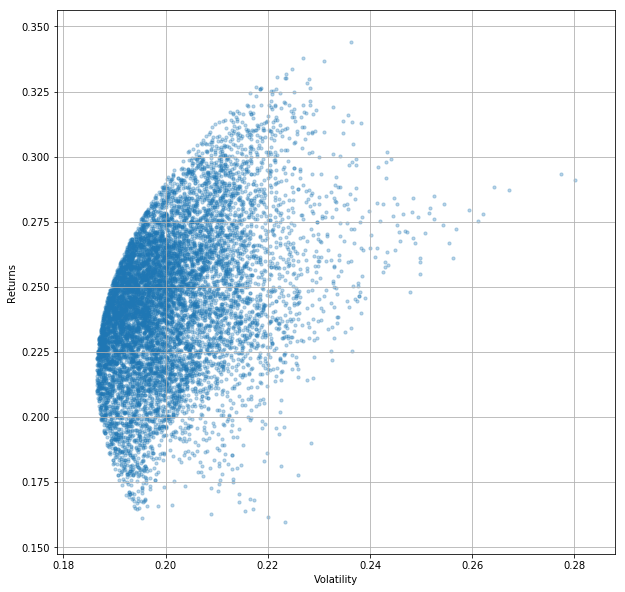

In [30]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [31]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

AAPL weight     0.259628
AMZN weight     0.027694
GOOGL weight    0.304592
NKE weight      0.408086
Returns         0.215602
Volatility      0.186514
Name: 6234, dtype: float64

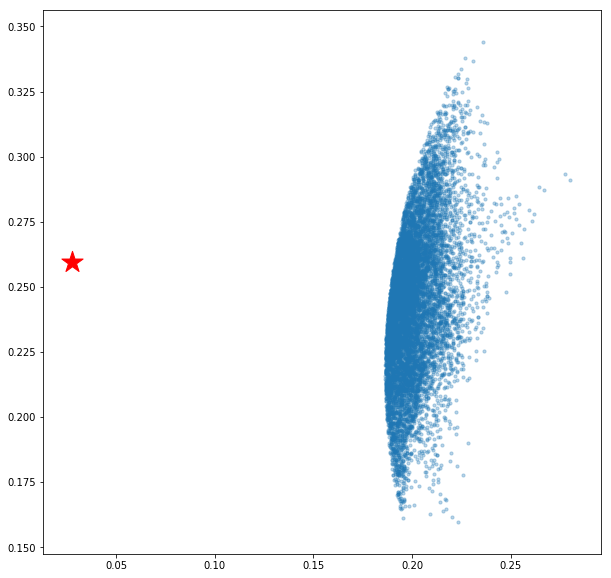

In [32]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

### Optimal Risky Portfolio

In [33]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

AAPL weight     0.711043
AMZN weight     0.173180
GOOGL weight    0.001681
NKE weight      0.114095
Returns         0.326922
Volatility      0.217743
Name: 9123, dtype: float64

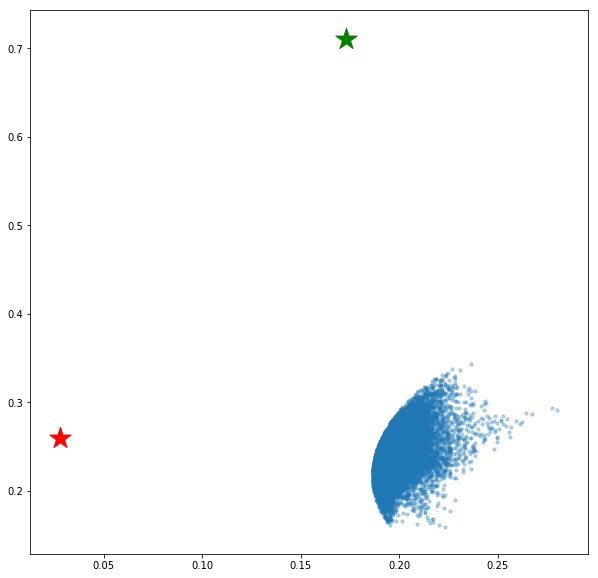

In [34]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

Dear students,

You can submit the remaining questions (2.b and 2.c) of the workshop on Sunday at 23:59 to tutors. The questions on : Minimum Risk portfolio and optimal risky portfolio.

Submit your jupyter code with the extension _FMW

Best,

Tutors.